#### LP 3 MINI PROJECT-ML

Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.). 

Dataset Link: https://www.kaggle.com/competitions/titanic/data 
        
#### GROUP MEMBERS:

Pratiksha Tambe -17

Shreya Shinde -18

Manitdeep Kour - 19

Kavita Devi - 20



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

# TRAINIG DATASET

In [6]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_train.shape #Total rows and columns in Training dataset

(891, 12)

In [8]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# TESTING DATASET

In [12]:
titanic_test.shape

(418, 11)

In [13]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Relationship between Features and Survival

In [16]:
survived = titanic_train[titanic_train['Survived'] == 1]
not_survived = titanic_train[titanic_train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(titanic_train)*100.0))

print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(titanic_train)*100.0))
print ("Total: %i"%len(titanic_train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


### Pclass vs. Survival


Higher class passengers have better survival chance.

In [17]:
titanic_train.Pclass.value_counts()
titanic_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

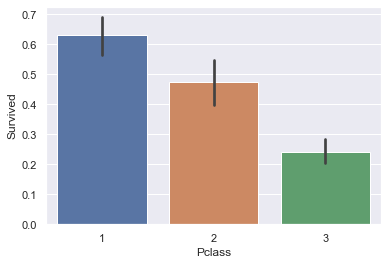

In [18]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

### Sex vs. Survival

Females have better survival chance.

In [19]:
titanic_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
titanic_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

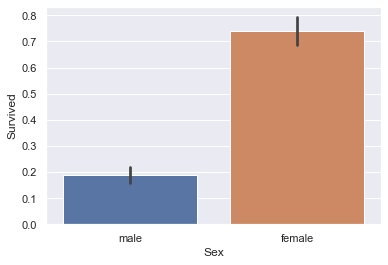

In [21]:
sns.barplot(x='Sex', y='Survived', data=titanic_train)

### Pclass & Sex vs. Survival

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

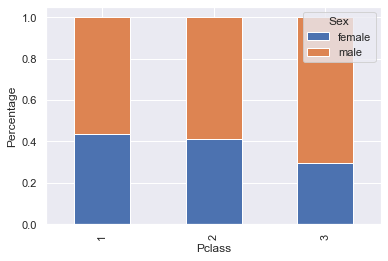

In [22]:
tab = pd.crosstab(titanic_train['Pclass'], titanic_train['Sex'])
print (tab)


tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

### Pclass, Sex & Embarked vs. Survival

C:\python\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


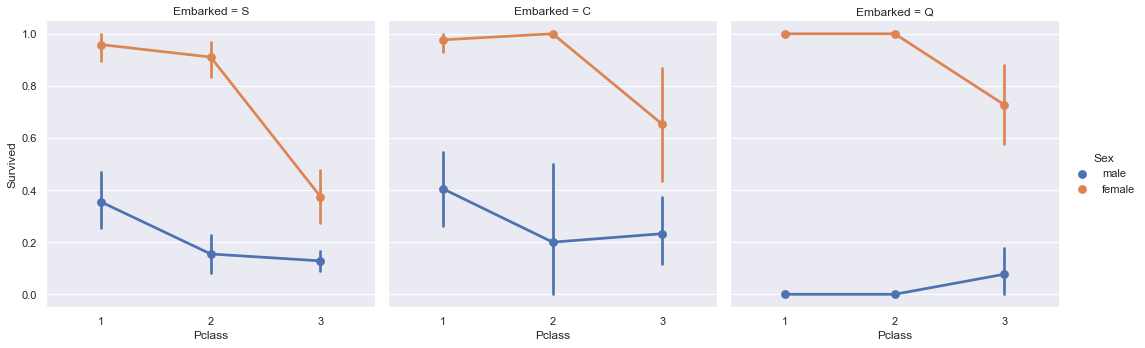

In [23]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=titanic_train)

From the above plot, it can be seen that:

1)Almost all females from Pclass 1 and 2 survived.
    2)Females dying were mostly from 3rd Pclass.
        3)Males from Pclass 1 only have slightly higher 4)survival chance than Pclass 2 and 3.

### Embarked vs. Survived

In [24]:
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

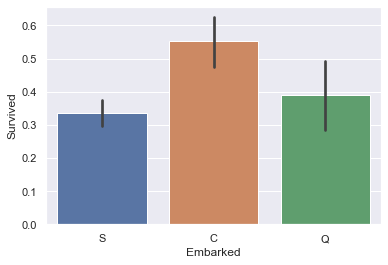

In [25]:
sns.barplot(x='Embarked', y='Survived', data=titanic_train)

### Parch vs. Survival

In [26]:
titanic_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

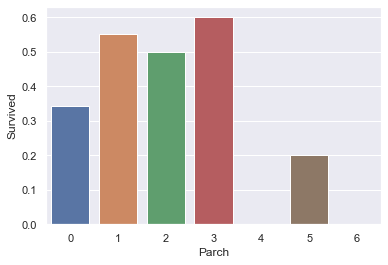

In [27]:
sns.barplot(x='Parch', y='Survived', ci=None, data=titanic_train) # ci=None will hide the error bar

### Age vs. Survival

<AxesSubplot:xlabel='Sex', ylabel='Age'>

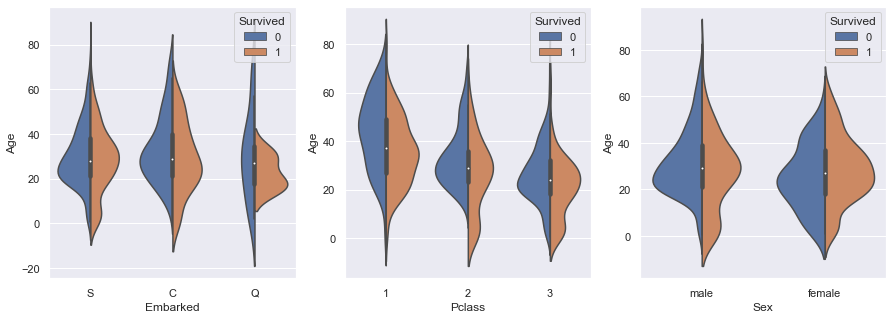

In [28]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=titanic_train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic_train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_train, split=True, ax=ax3)


From Pclass violinplot, we can see that:

1)1st Pclass has very few children as compared to other two classes.



 2)1st Plcass has more old people as compared to other two classes.
 
 
 
 3)Almost all children (between age 0 to 10) of 2nd Pclass survived.
 
 
 
4)Most children of 3rd Pclass survived.



5)Younger people of 1st Pclass survived as compared to its older people.

From Sex violinplot, we can see that:

1)Most male children (between age 0 to 14) survived.



2)Females with age between 18 to 40 have better survival chance.

## Correlating Features

<AxesSubplot:>

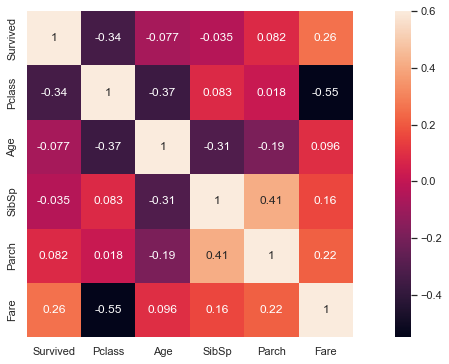

In [30]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Feature Extraction


### Name Feature

In [31]:
titanic_combined_data = [titanic_train, titanic_test] # combining train and test dataset

for dataset in titanic_combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')


We have added a new column named Title in the Train dataset with the Title present in the particular passenger name. We now replace some less common titles with the name "Other".

In [ ]:
for dataset in titanic_combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')


    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()    

In [33]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in titanic_combined_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Sex Feature

In [34]:
for dataset in titanic_combined_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Embarked Feature

In [36]:
titanic_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We find that category "S" has maximum passengers. Hence, we replace "nan" values with "S".

In [38]:
for dataset in titanic_combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [39]:
for dataset in titanic_combined_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Age Feature

In [40]:
for dataset in titanic_combined_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
titanic_train['AgeBand'] = pd.cut(titanic_train['Age'], 5)


print (titanic_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.536364
1   (16.0, 32.0]  0.353468
2   (32.0, 48.0]  0.370079
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\prati\AppData\Local\Temp\ipykernel_22176\1147728457.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


Now, we map Age according to AgeBand.

In [41]:
for dataset in titanic_combined_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

### Fare Feature

In [42]:
for dataset in titanic_combined_data:
    dataset['Fare'] = dataset['Fare'].fillna(titanic_train['Fare'].median())

In [43]:
titanic_train['FareBand'] = pd.qcut(titanic_train['Fare'], 4)

print (titanic_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())


          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


Map Fare according to FareBand

In [44]:
for dataset in titanic_combined_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
      
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

### SibSp & Parch Feature

In [45]:
for dataset in titanic_combined_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


About data shows that:

1)Having FamilySize upto 4 (from 2 to 4) has better survival chance.



2)FamilySize = 1, i.e. travelling alone has less survival chance.



3)Large FamilySize (size of 5 and above) also have less survival chance.

In [46]:
for dataset in titanic_combined_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (titanic_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


## Feature Selection

In [47]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']

titanic_train = titanic_train.drop(features_drop, axis=1)

titanic_test = titanic_test.drop(features_drop, axis=1)

titanic_train = titanic_train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [48]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [49]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


## Classification & Accuracy

In [50]:
X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

X_test = titanic_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Logistic Regression

In [52]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)



print (str(acc_log_reg) + ' percent')

80.13 percent


### Support Vector Machine (SVM)

In [54]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)


print (str(acc_svc)+" percent")

83.39 percent


### Linear SVM

In [55]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)


print (str(acc_linear_svc) + ' percent')

80.13 percent


C:\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### k-Nearest Neighbors

In [56]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)

print (str(acc_knn) + ' percent')

83.84 percent


### Decision Tree

In [57]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)


print (acc_decision_tree)

87.32


### Random Forest

In [58]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print (acc_random_forest)

87.32


### Gaussian Naive Bayes

In [59]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)


print (acc_gnb)

77.67


## Confusion Matrix (for random forest clasiifier)

Accuracy: 87 % 

Confusion Matrix in Numbers
[[505  44]
 [ 69 273]]

Confusion Matrix in Percentage
[[0.92 0.08]
 [0.2  0.8 ]]



<AxesSubplot:>

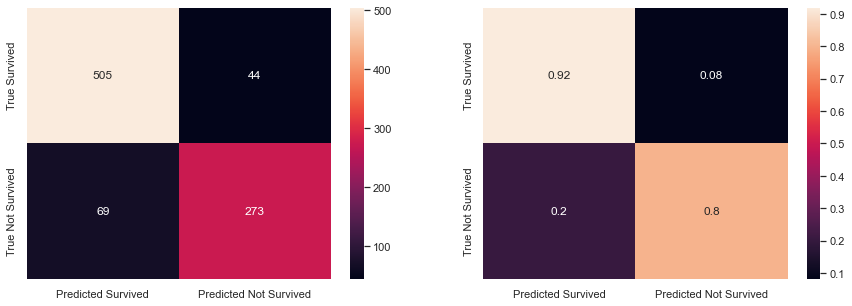

In [60]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)


print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

# Comparing Models

In [62]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb]
    })


models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,87.32
5,Random Forest,87.32
3,KNN,83.84
1,Support Vector Machines,83.39
0,Logistic Regression,80.13
2,Linear SVC,80.13
6,Naive Bayes,77.67
